# Check Call Length Distribution and Get Sample

In [34]:
import numpy as np
import pandas as pd
import os
from mutagen.mp3 import MP3
import glob

filenames = glob.glob('./Data/ccc-speech-to-text/*mp3')
file_name_and_length = {}

for file in filenames:
    audio = MP3(file)
    file_name_and_length[file] = (audio.info.length/60, round(os.path.getsize(file)/1024, 0))                                                  
                                  
df = pd.DataFrame.from_dict(file_name_and_length, orient='index')
df.reset_index(inplace = True)
df.columns = ['file_name', 'length[min]', 'size[Kb]']
df

,file_name,length[min],size[Kb]
0,./Data/ccc-speech-to-text\0701431C2.mp3,19.4628,4562.0
1,./Data/ccc-speech-to-text\07211613C1.mp3,4.1400,970.0
2,./Data/ccc-speech-to-text\07313221C2.mp3,2.4732,580.0
3,./Data/ccc-speech-to-text\07372317C1.mp3,3.6744,861.0
4,./Data/ccc-speech-to-text\07402311C2.mp3,1.3872,325.0
...,...,...,...
1455,./Data/ccc-speech-to-text\17475591C1.mp3,6.6876,1567.0
1456,./Data/ccc-speech-to-text\181129118C2.mp3,2.8968,679.0
1457,./Data/ccc-speech-to-text\183428136C2.mp3,5.1072,1197.0
1458,./Data/ccc-speech-to-text\184119141C2.mp3,4.0308,945.0


In [35]:
df.describe()

,length[min],size[Kb]
count,1460.000000,1460.000000
mean,5.351999,1254.376712
std,4.107634,962.729167
min,0.013200,3.000000
25%,2.889000,677.500000
50%,4.175400,978.500000
75%,6.551700,1535.250000
max,39.994800,9374.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023783C6B0B8>,
      dtype=object)

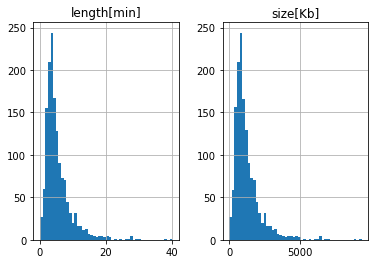

In [36]:
df.hist(bins=50)

In [38]:
sample = df.loc[(df['length[min]'] >= 2) & (df['length[min]'] <= 7.5), :]
sample.describe()

,length[min],size[Kb]
count,1018.000000,1018.000000
mean,4.168490,976.996071
std,1.405319,329.369443
min,2.005200,470.000000
25%,3.067500,719.000000
50%,3.948000,925.500000
75%,5.117100,1199.500000
max,7.496400,1757.000000
